In [4]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [5]:
# Importing the dataset
data = pd.read_csv('grade_students.csv')
data.head()

,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore
0,1,9,516,578,601,493
1,0,12,451,507,584,436
2,1,4,483,526,529,486
3,1,15,516,505,556,536
4,1,2,433,463,504,426


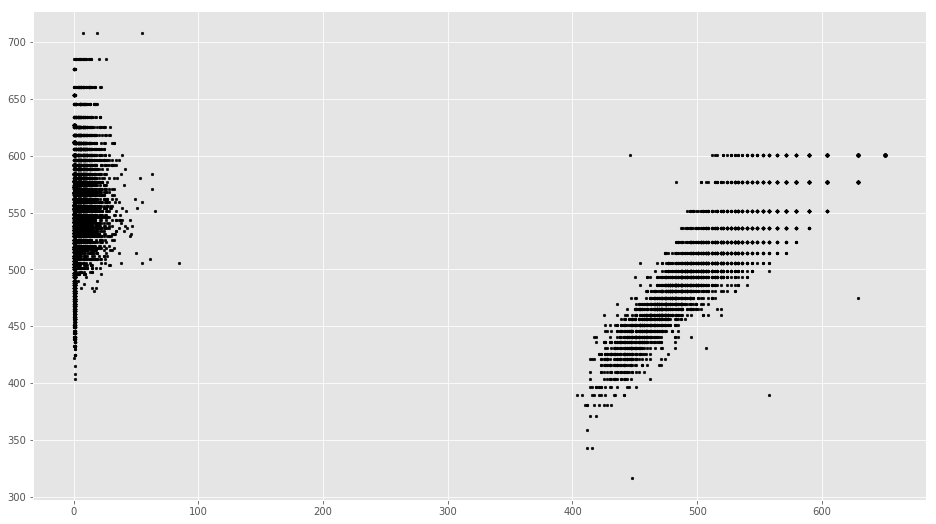

In [6]:
# Getting the values and plotting it
f1 = data['g1freelunch'].values
f2 = data['g1absent'].values
f3 = data['g1readscore'].values
f4 = data['g1mathscore'].values
f5 = data['g1listeningscore'].values
f6 = data['g1wordscore'].values
fx=np.concatenate((f1,f2,f3), axis=None)
fy=np.concatenate((f4,f5,f6), axis=None)
X = np.array(list(zip(fx, fy)))
plt.scatter(fx, fy, c='black', s=7)

In [7]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [8]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[548. 528.]
 [572. 349.]
 [401. 422.]]


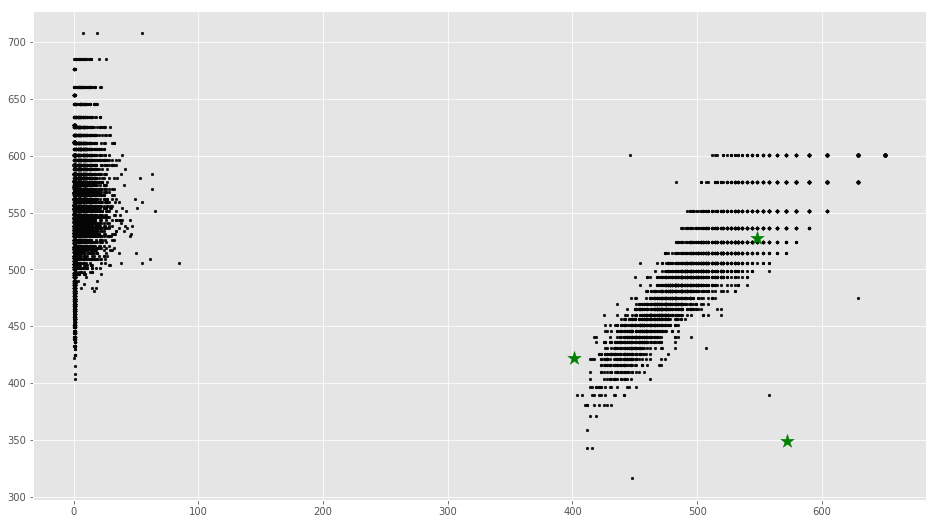

In [9]:
# Plotting along with the Centroids
plt.scatter(fx, fy, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [13]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

# Storing the new centroid values
C_new = deepcopy(C)
print(C_new)

[[571.4941   562.8967  ]
 [481.38174  476.25558 ]
 [  3.961081 549.64026 ]]


[571.4941 562.8967]
[481.38174 476.25558]
[  3.961081 549.64026 ]


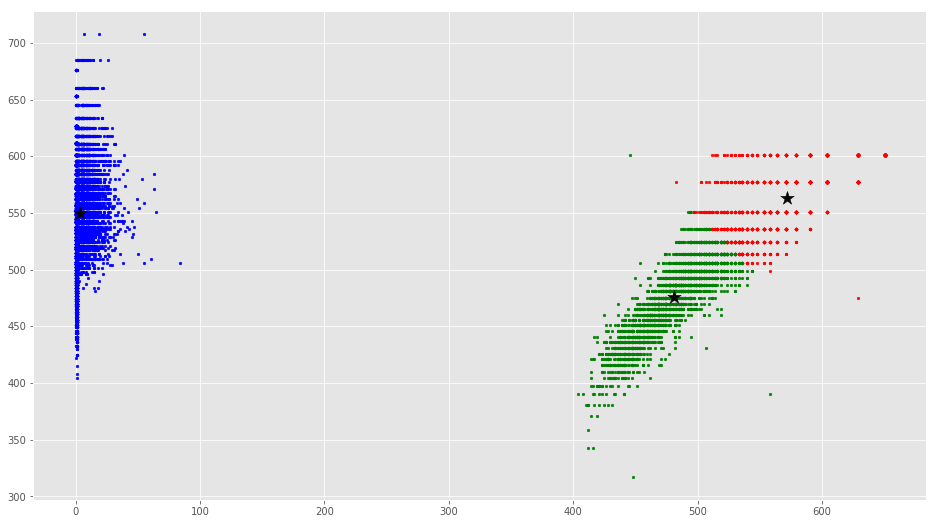

In [14]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')